In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['cluster'] = clustering.fit_predict(X)

C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


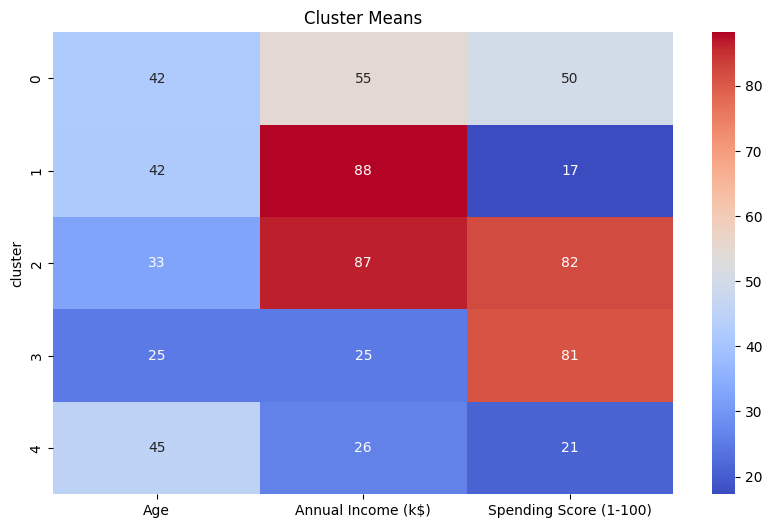

In [10]:
cluster_means = df.groupby('cluster').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], annot=True, cmap='coolwarm')
plt.title('Cluster Means')
plt.show()

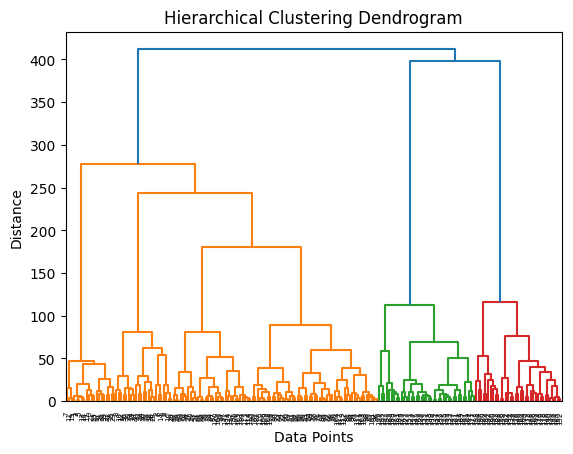

In [11]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()